# Estatística com Python: Testes de Hipótese

In [0]:
%run /datalake_functions/StorageConnector

In [0]:
%run /datalake_functions/Utils

Notebook Utils associated with success!

Out[21]: <function __main__._calc_std_sas(colunas: list)>

In [0]:
ABFS_PATH = getABFS(storage_account='stomktanalyticsprod',container='stomktanalyticsprod')
ABFS_PATH_temp = getABFS(storage_account='stomktanalyticsprod',container='databricksmetadata')
ABFS_SHARED = getABFS(storage_account='stomktanalyticsprod',container='shared')

Storage Account: stomktanalyticsprod
Container: stomktanalyticsprod
Storage Account: stomktanalyticsprod
Container: databricksmetadata
Storage Account: stomktanalyticsprod
Container: shared

In [0]:
df = (spark.read
.options(header=True)
.option("encoding", "ISO-8859-1")
.csv(ABFS_PATH + "/Gabriel_Oliveira/dadosAlura1",inferSchema=True)
)
df.createOrReplaceTempView("dadosAlura1")

## 1. Carregando os dados

In [0]:
import pandas as pf
import numpy as np

dados = df.toPandas() #Transformando os dados do Spark em um formato que o Pandas consegue trabalhar
dados #Mostrando os dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## 2. Testes de Hipóteses
Testes de hipóteses são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre parâmetros populacionaris e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

### 2.1. Teste de normalidade
Verificar se a variável segue e uma distribuição normal. A função normaltest testa se a hipótese nula H0 de que a amostra é proveniente de uma distribuição normal.

In [0]:
from scipy.stats import normaltest
import pandas as pd
significancia = 0.05

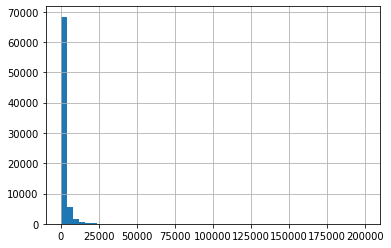

In [0]:
#Testando a variavel renda

dados.Renda.hist(bins = 50)

In [0]:
#Regra de rejeição: rejeita H0 se o valor p <= 0.05
stat_test, p_valor = normaltest(dados.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0

In [0]:
p_valor <= significancia

Out[34]: True

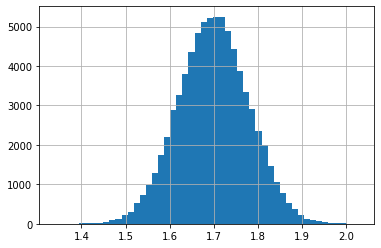

In [0]:
#Testando a variável altura
dados.Altura.hist(bins = 50)

In [0]:
stat_test, p_valor = normaltest(dados.Altura)
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501

In [0]:
p_valor <= significancia

Out[37]: False

### 2.2. Etapas básicas de um Teste

#### Passo 1 -  Formulação das Hipóteses H0 e H1
- De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa H1.
- A hipótese nula sempre afirma uma igualdade ou porpriedade populacional, e H1 a desigualdade que nega H0.
- No caso da hipótese nula H0, a igualdade pode ser representada por uma igualdade simples ou um maior-igual e menor-igual. Sempre complementar ao estabelecido pela hipótese alternativa.
- A hipótese alternativa H1 deve definir uma desigualdade que pode ser uma diferença simples ou dois tipos > ou <.

#### Passo 2 - Escolha da distribuição amostral adequada
-  Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar uma distribuição amostral, como mostrado pelo TLC.
- Para um tamanho de amostra menor que 30, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o devio padrão populacional for conhecido, deve-se utilizar a normal.
- Para um tamanho de amostra menor que 30, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido , deve-se utilizar a distribuição t-Student.

#### Passo 3 - fixação da significância do teste (alpha), que define as regiôes de aceitação e rejeição das hipóteses (os valores mais frequentes são 10%, 5% e 1%)
- O nível de confiança (1 - alpha) representa a probabilidade de acerto da estimativa. De forma complementar o nível de significância (alpha) expressa a probabilidade de erro da estimativa.

#### Passo 4 - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
- nos testes paramétricos, distância relativa e estatística amostral e o valor alegado como provável
- neste passo são obtidos as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

####  Passo 5. Aceitação ou rejeição da Hipótese nula
- No caso de o intervalo de aceitação coter a estatísitca-teste, aceita-se H1 como estatisticamente válido e rejeita-se H1 como tal
- No caso de o intevalo de acietação não conter a estatística-teste, rejeita-se H0 e aceita-se H1 como provavelmnete verdadeira
- A aceitação também se verifica com a probabilidade de cauda (p-valor). se maior que alpha aceita-se H0

## 3. Testes Paramétricos e ententendo o p-valor

### 3.1. Teste Bicaudal
A empresa Suco Bom produz sucos de frutas em embalagens de 500ml. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por um amáquina que às vezs apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou para menos no conteúdo. Quando o volume médio cai de 500ml, a empresa se preocupa em perder vendas e ter problemas com os órgãos fiscalizadores. Quando o volume passa de 500ml, a empresa começa a se preocupar com prejuízos no processo de produção.
O setor de controle de qualidade da empresa Suco Bom extrai, periodicamnete, amostras de 50 embalagens para monitorar o processo de produção. Para cada amostra, é reealizado um teste de hipótese para avaliar se o maquinário se desajustou. A equipe de controle da qualidade assume um nível de significância de 5%. Suponha agora que um amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24ml. Esse valor de média amostral é suficientemente maisor que 500ml para nos fazer ajeitar a hipótese de que a média do processo é de 500ml ao nível de significânciade 5%?

In [0]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [0]:
amostra = pd.DataFrame(amostra, columns = ['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [0]:
media_amostra = amostra.mean()
media_amostra

Out[40]: Amostra 503.24
dtype: float64

In [0]:
desvio_padrao_amostra = amostra.std()
desvio_padrao_amostra

Out[41]: Amostra 4.483803
dtype: float64

In [0]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

H0: mi = 500
H1: mi =! 500

n>30 > desvio padrao populacional desconhecido > xbarra mais ou menos z * s/raiz(n)

In [0]:
from scipy.stats import norm

z_alpha_2 = norm.ppf(0.975)

In [0]:
z = (media_amostra - media)/(desvio_padrao_amostra/np.sqrt(n))

z = round(z,2)

Rejeitamos H0 se z <= -z_alpha_2 ou de z >= z_alpha_dois

In [0]:
print(z <= z_alpha_2)
print(z >= z_alpha_2)

Amostra False
dtype: bool
Amostra True
dtype: bool

Conclusão: Como a méida amostral xbarra é significativamente maior que 500ml, rejeitamo H0. Neste caso, devem ser tomadas proidências para ajustar o maquinário que preenche as embalagens.

### 3.2. p-valor
Rejeitamos H0 se o no p-valor for <= alpha (nível de significância)

In [0]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

Out[46]: array([3.22158812e-07])

In [0]:
if p_valor < significancia:
  print('Rejeita H0')

Rejeita H0

In [0]:
#p valor com Python
from statsmodels.stats.weightstats import ztest

ztest(x1 = amostra, value = media)

Out[48]: (array([5.10955978]), array([3.22910317e-07]))

In [0]:
#Considere novamente os dados do exercício anterior. Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g e marque a alternativa que indica o p-valor do teste aplicado (considere somente 5 casas decimais).

media = 500
n = 30
media_amostral = 485
sigma = 20
significancia = 0.5
z_alpha_2 = norm.ppf(0.975)

z = (media_amostral - media)/(sigma/np.sqrt(n))
print('z =',z)

p_valor = 2 * (norm.sf(z))
print('p-valor=', p_valor)

z = -4.107919181288746
p-valor= 1.999960076025231

### 3.2. Teste unicaudal
Problema: um famoso fabricante de refrigerante alega que um alta de 350ml de seu principal produto contém, no máximo 37g gramas de açucar. Esta alegação nos leva a etender que a quantidade média de açucar em uma lata de refrigerante deve ser igual ou menor que 37g.
Um consumidor desconfiado e com conhecimentos de inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente em um conjunto de estabelecimentos distintos, uma amostra de 25 latas do refrigerente em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açucar em todas as 25 latas de sua amostra.
Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

In [0]:
#n < 30 > se distribui como uma normal > sigma desconhecido > xbarra mais ou menos t*(sigma/raiz(n))

In [0]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [0]:
amostra = pd.DataFrame(amostra, columns = ['Amostra'])

In [0]:
media_amostra = amostra.mean()
media_amostra

Out[53]: Amostra 36.2504
dtype: float64

In [0]:
desvio_padrao_amostra = amostra.std()
desvio_padrao_amostra

Out[54]: Amostra 0.966754
dtype: float64

In [0]:
media = 37
significancia = 0.05
confianca = 1- significancia
n = 25
graus_de_liberdade = n - 1

- H0: mi <= 37
- H1: mi > 37

In [0]:
from scipy.stats import t as t_student

#Obtendo t-alpha
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

Out[56]: 1.7108820799094275

In [0]:
t = (media_amostra - media)/(desvio_padrao_amostra/np.sqrt(n))

if float(t) >= t_alpha:
  print('Rejeita H0')
else:
  print('Aceita H0')

Aceita H0

In [0]:
float(t)

Out[58]: -3.876893119952081

In [0]:
# Hipóteses: Ho: mi <= 150; H1: mi > 150
# n <= 30 -> Normalmente distribuída -> sigma desconhecido -> xbarra + ou - t*(s/raiz(n))

n = 20
media = 150
graus_de_liberdade = n - 1
media_amostral = 230
desvio_padrao = 90
significancia = 0.05
confianca = 1 - significancia
t_alpha = t_student.ppf(confianca, graus_de_liberdade)

t = (media_amostral - media)/(desvio_padrao/np.sqrt(n))

if float(t) >= t_alpha:
  print(f't = {t}, t >= t-alpha, logo: Rejeita H0')
else:
  print(f't = {t}, t < t-alpha, log Aceita H0')

t = 3.9752319599996264, t >= t-alpha, logo: Rejeita H0

In [0]:
#A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. O desvio padrão amostral foi de 80 g. Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria? Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

# n > 30 -> sigma desconhecido
# H0 >= 350; H1 < 350

media = 350
media_amostral = 330
n = 35
desvio_padrao_amostral = 80
confianca = 1 - significancia
significancia = 0.05
z_alpha_2 = norm.ppf(0.975)

z = (media_amostral - media)/(desvio_padrao_amostral/np.sqrt(n))

if z <= - z_alpha_2:
  print(f'z = {z}, temos que z <= - z_alpha_2, logo rejitemos H0.')
else:
  print(f'z = {z}, H0 aceito.')

z = -1.479019945774904, H0 aceito.

### 3.3. Teste para duas Amostras
Em nosso dataset temos o rendimento dos cehefes de domicílio obtidos da PEsquina Nacional por Amostra de Domicílios - PNAD. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, pricipalmnete entre homens e mulheres. Duas amostras aleatórias, uma de 500 homens e outra de 500 mulheres, foram selecionadas em nosso dataset. Com objetivo de comprovar tal desigualdade, teste a igualdade das médias entre duas amostras com nível de significância de 1%.

In [0]:
#Seleção das Amostras
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda
mulheres = dados.query('Sexo == 1').sample(n = 500, random_state = 101).Renda

In [0]:
#dados do problema
media_amostra_M = mulheres.mean()
media_amostra_H = homens.mean()

media_amostra_M, media_amostra_H

Out[62]: (1357.528, 2142.608)

In [0]:
#dados do problema
desvio_padrao_M = mulheres.std()
desvio_padrao_H = homens.std()

desvio_padrao_M, desvio_padrao_H

Out[63]: (1569.901190748458, 2548.0508024998717)

In [0]:
#dados do problema
significancia = 0.01
confianca = 1 - significancia
n_H = 500
n_M = 500
D_0 = 0

- m1 = Média das rendas dos homens
- m2 = Média das rendas das mulheres

- H0: mi <= m2 ou m1 - m1  <= 0
- H1: mi > m2 ou m1 - m2 > 0

1. n >= 30: aproximamos para uma normal
2. sigma conhecido
3. Utilizamos o z_alpha_2

In [0]:
probabilidade = confianca
z_alpha = norm.ppf(probabilidade)
z_alpha

Out[65]: 2.3263478740408408

In [0]:
# z = ((x_barra1 - z_barra2) - D0)/raiz((s1**2/n1)+(s2**2/n2))

z = ((media_amostra_H - media_amostra_M) - D_0)/np.sqrt(((desvio_padrao_H**2)/n_H)+((desvio_padrao_M**2)/n_M))

# z é maior que z_alpha, logo se encontra na área de rejeição, REJEITEMOS H0, logo a média dos é maior que a das mulheres  

In [0]:
# H0: mi1 - m2 <= 2; H1: m1 - m2 > 2

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_shampoo_Novo = shampoo_Novo.mean()
media_shampoo_Antigo = shampoo_Antigo.mean()

desvio_shampoo_Novo = shampoo_Novo.std()
desvio_shampoo_Antigo = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
D_0 = 2
n_shampoo_Antigo = len(shampoo_Antigo)
n_shampoo_Novo = len(shampoo_Novo)
graus_de_liberdade = n_shampoo_Antigo + n_shampoo_Novo - 2
t_alpha = t_student.ppf(confianca, graus_de_liberdade)

#N < 30 -> sigma desconhecido -> estatística de test z
denominador = ((desvio_shampoo_Antigo**2)/n_shampoo_Antigo)+((desvio_shampoo_Novo**2)/n_shampoo_Novo)

t = ((media_shampoo_Novo - media_shampoo_Antigo)- D_0)/ (denominador**(1/2))

if t < t_alpha:
  print(f't = {t} Aceita H0 e a empresa está errada.')
else:
  print(f't = {t} Rejeita H0 e a empresa está certa.')




t = 2.6646283978779297 Rejeita H0 e a empresa está certa.

## 4. Testes Não Paramétricos
Quando a distribuição das minhas amostras não seguem uma normal, não temos padrões do TCL para seguir, assim, para testarmos hipóteses utilizamos testes não-paramétricos.

Problema: Antes de cada campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter a certeza de que não são viciadas, ou seja, não tendem para determinado resultado. Para isso, um testes simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo 50 vezes e contar a frequência de caras e coroas obtidas. A tabela abaixo mostra o resultado obtido no experimento.

- CARA: Obervado: 30; Esperado: 25
- COROA: Obervado: 20; Esperado 25

A um nível de signficância de 5%, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face CARA voltada para cima?

### 4.1. Teste do Qui-Quadrado (qui**2)

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada qui elevada ao quadrado.

In [0]:
import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


In [0]:
F_Observada = [17,33]
F_Esperada = [25,25]
significancia = 0.05
confianca = 1 - significancia
k = 2
graus_de_liberdade = k - 1

- H0: Fcara = Fcoroa
- H1: Fcara =! Fcoroa

In [0]:
from scipy.stats import chi
tabela_t_chi_2[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


In [0]:
chi_2_alpha = chi.ppf(confianca, graus_de_liberdade)**2
chi_2_alpha

Out[71]: 3.8414588206941245

In [0]:
#Chi_quadrado = somatorio(i = 1, k)((FiObs - FiEsp)**2)/FiEsp

chi_2 = 0
for i in range (len(F_Observada)):
  chi_2_aux = ((F_Observada[i] - F_Esperada[i])**2)/F_Esperada[i]
  chi_2 += chi_2_aux
  
chi_2

Out[72]: 5.12

chi_2 > chi_2_alpha, logo rejeitamos o H0, 5.12 se posiciona na áres de rejeição do teste. Assim, a moeda não é honesta.

In [0]:
chi_2

Out[73]: 5.12

In [0]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

Out[74]: 2.262741699796952

In [0]:
p_valor = chi.sf(raiz_chi_2, df = 1)
p_valor

Out[75]: 0.023651616655355978

p_valor <= significancia significa que devemos rejeitar a H0.

In [0]:
p_valor <= significancia

Out[76]: True

In [0]:
from scipy.stats import chisquare
chi_2, p_valor = chisquare(f_obs = F_Observada,
                           f_exp = F_Esperada)
print(chi_2, p_valor)

5.12 0.023651616655356

In [0]:
#A realização de um teste não paramétrico Qui-quadrado, com apenas 5 graus de liberdade, obteve-se a estatística de teste no valor de 7,45. Qual seria o p-valor para este teste?

graus_liberdade = 5
chi_2 = 7.45

p_valor = chi.sf(np.sqrt(chi_2), df = 5)
p_valor

Out[78]: 0.18926579121171605

### 4.2. Teste de Wilcoxon
Leva em consideração que as amostras comparadas são dependentes.

Problema: Um novo tratamento para acabar com hábito do fumo está sendo empregado em um grupo de 35 pacientes voluntários. De cada paciente testado foram obtidos as informações de quantidade de cigarros consumidos por dia antes e depois do término do tratamento. Asssumindo um nível de confianca de 0.95 é possível concluir que depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar no grupo de pacientes?

In [0]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [0]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [0]:
media_antes = fumo.Antes.mean()
media_depois = fumo.Depois.mean()
media_antes, media_depois

Out[81]: (31.857142857142858, 11.2)

- H0: mi_antes = mi_depois
- H1: mi_antes > mi_depois

- Tamanho da amostra > 20? 
Sim, logo, utilizaremos a normal.

In [0]:
#obtendo z_alpha_dois

z_alpha_dois = round(norm.ppf(0.975),2)
z_alpha_dois 

Out[82]: 1.96

In [0]:
fumo

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [0]:
fumo['dif'] = fumo.Depois - fumo.Antes
fumo

,Antes,Depois,dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1
5,52,16,-36
6,21,13,-8
7,29,12,-17
8,10,19,9
9,22,17,-5


In [0]:
fumo['|Dif|'] = fumo.dif.abs()
fumo

,Antes,Depois,dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1
5,52,16,-36,36
6,21,13,-8,8
7,29,12,-17,17
8,10,19,9,9
9,22,17,-5,5


In [0]:
fumo.sort_values(by = '|Dif|', inplace = True)
fumo

,Antes,Depois,dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [0]:
fumo['Posto'] = range(1, len(fumo)+1)
fumo

,Antes,Depois,dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5
9,22,17,-5,5,6
6,21,13,-8,8,7
29,23,14,-9,9,8
8,10,19,9,9,9
17,15,4,-11,11,10


In [0]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [0]:
posto.reset_index(inplace=True)
posto

,|Dif|,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [0]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo

,Antes,Depois,dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [0]:
fumo = fumo.merge(posto, left_on = '|Dif|', right_on = '|Dif|', how = 'left')
fumo

,Antes,Depois,dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [0]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.dif > 0 else 0, axis = 1)
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.dif < 0 else 0 , axis = 1)
fumo

,Antes,Depois,dif,|Dif|,Posto,Posto (+),Posto (-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0
5,22,17,-5,5,6.0,0.0,6.0
6,21,13,-8,8,7.0,0.0,7.0
7,23,14,-9,9,8.5,0.0,8.5
8,10,19,9,9,8.5,8.5,0.0
9,15,4,-11,11,10.0,0.0,10.0


In [0]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo

,Antes,Depois,dif,|Dif|,Posto (+),Posto (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


In [0]:
# T =  menor da somas de postos de mesmo sinal

T = min((fumo['Posto (+)']).sum(), fumo['Posto (-)'].sum())
T

Out[94]: 22.0

In [0]:
# miT
mu_T = (n*(n+1))/4
mu_T

Out[95]: 315.0

In [0]:
#sigma T

sigma_T = np.sqrt(((n*(n+1))*(2*n +1))/24)
sigma_T

Out[96]: 61.053255441458646

In [0]:
#Obter Z teste

Z = (T - mu_T)/sigma_T
Z

Out[97]: -4.799088891843698

Z = -4.8 fica fora da area de aceitação. Z<= -1.96. Assim, rejeitamos H0, ou seja, há uma diferença entre os grupos. Portanto, o tratamento apresentou um resulta muito satifatório.

In [0]:
from scipy.stats import wilcoxon

T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)
print('T:', T)
print('p_valor:', p_valor)

T: 22.0
p_valor: 1.584310018505865e-06

In [0]:
if p_valor <= significancia:
  print('Rejeita H0.')
else:
  print('Aceita H0.')

Rejeita H0.

In [0]:
#Desconfiado da eficiência dos cursos e materiais de estudo online da Alura, um professor resolveu realizar um teste com um grupo de 14 alunos de sua classe. Para isto, ele submeteu estes alunos a duas etapas distintas e logo depois de cada etapa, aplicou uma avaliação. Na etapa inicial, foram oferecidas aulas normais, sem a utilização do material de apoio da Alura. Na segunda etapa, foram também oferecidas aulas normais, mas com a utilização do material de apoio da Alura. As notas obtidas pelos alunos estão na tabela abaixo:

#Assinale a alternativa que apresenta o resultado do teste, não paramétrico de Wilcoxon, aplicado pelo professor (estatística de teste T e decisão do teste). Considere um nível de significância de 10%.

notas = pf.DataFrame({'Sem Alura': 
                   [7,8,6,6,10,4,2,5,9,2,4,9,1,10],
                     'Com Alura':
                   [10,10,9,9,9,7,5,8,10,6,3,7,4,8]  })
significancia = 0.1

T, p_valor = wilcoxon(notas['Sem Alura'], notas['Com Alura'])
print('T:', T)
print('p_valor:', p_valor)
print()
if p_valor <= significancia:
  print('Rejeita H0. Há diferença.')
else:
  print('Aceita H0. Não há diferença.')


T: 14.0
p_valor: 0.01405249884356315

Rejeita H0. Há diferença.

### 4.3. Teste de Mann-Whitney
Leva em consideração que as amostras comparadas são independentes (podendo ser até de tamanhos diferentes.)

In [0]:
#amostras
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda
homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda

#medias
media_amostra_H = homens.mean()
media_amostra_M = mulheres.mean()

#Outros
significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens) #Nesse teste n1 deve ser menor que n2
n_2= len(mulheres)

media_amostra_H, media_amostra_M

Out[101]: (1341.6666666666667, 1090.75)

1. Mim = media das rendas dos chefes de domicílios do sexo feminino
2. Mih = media das rendas dos chefes de comicilios do sexo masculino


- H0: Mim = Mih
- H1: Mim < Mih

Com n pequeno trabalhamos com a t_student.

In [0]:
graus_de_liberdade = n_1 + n_2 - 2
graus_de_liberdade

Out[102]: 12

In [0]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

t_alpha

Out[103]: -1.7822875556491593

In [0]:
H = pd.DataFrame(homens)
H['Sexo'] = 'Homens'
H

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens
17422,1200,Homens


In [0]:
M = pd.DataFrame(mulheres)
M['Sexo'] = 'Mulheres'
M

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres
24707,400,Mulheres
60340,700,Mulheres
17035,788,Mulheres


In [0]:
sexo = H.append(M)
sexo.reset_index(inplace = True, drop = True)
sexo

,Renda,Sexo
0,1200,Homens
1,2000,Homens
2,850,Homens
3,800,Homens
4,2000,Homens
5,1200,Homens
6,1100,Mulheres
7,400,Mulheres
8,788,Mulheres
9,4300,Mulheres


In [0]:
sexo.sort_values(by = 'Renda', inplace = True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [0]:
sexo['Posto'] = range(1, len(sexo)+1)
sexo

,Renda,Sexo,Posto
10,250,Mulheres,1
7,400,Mulheres,2
11,400,Mulheres,3
12,700,Mulheres,4
8,788,Mulheres,5
13,788,Mulheres,6
3,800,Homens,7
2,850,Homens,8
6,1100,Mulheres,9
0,1200,Homens,10


In [0]:
posto = sexo[['Renda', 'Posto']].groupby(['Renda']).mean()
posto

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [0]:
posto.reset_index(inplace = True)
posto

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [0]:
sexo.drop(['Posto'], axis = 1, inplace = True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [0]:
sexo = sexo.merge(posto, 
                  left_on = 'Renda',
                  right_on = 'Renda',
                  how = 'left')
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


In [0]:
#R1: Soma dos postos do grupo n1
#R2: Soma dos postos do grupo n2

Temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()

R_1 = Temp.loc['Homens'][0]
R_2 = Temp.loc['Mulheres'][0]
R_1, R_2

Out[117]: (61.0, 44.0)

In [0]:
u_1 = n_1 * n_2 + ((n_1 * (n_1 + 1)) / (2)) - R_1


u_2 = n_1 * n_2 + ((n_2 * (n_2 + 1)) / (2)) - R_2

u = min(u_1, u_2)

u_1, u_2, u


Out[118]: (8.0, 40.0, 8.0)

In [0]:
mu_u = (n_1 + n_2)/2
mu_u

Out[119]: 7.0

In [0]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

Out[121]: 7.745966692414834

In [0]:
Z = (u - mu_u) / sigma_u
Z.round(2)


Out[122]: -2.07

Z está na área de rejeição de H0, assim segue que há diferença nas médias de rendas dos chefes de comicílios comparados entre homens e mulheres.

In [0]:
from scipy.stats import mannwhitneyu

u, p_valor = mannwhitneyu(mulheres, homens, alternative = 'less')
print('u:',u)
print('p_valor:', p_valor)

u: 8.0
p_valor: 0.022221119551528605

In [0]:
p_valor <= significancia

Out[127]: True